In [155]:
import pandas as pd
import math

In [156]:
stats_df = pd.read_csv("Resources/mj_Raw.csv")
static_df = pd.read_csv("Resources/mj_static_data.csv")

In [157]:
merge_df = pd.merge(static_df, stats_df, on = "Player", how = "inner", suffixes = [" per Season", ""])

In [158]:
salary_per_gs = round(merge_df.groupby('Rnd')['Salary'].sum()/merge_df.groupby('Rnd')['GS'].sum())
salary_per_win = round(merge_df.groupby('Rnd')['Salary'].sum()/merge_df.groupby('Rnd')['Wins'].sum())

starts_per_player = round(merge_df.groupby('Rnd')['GS'].sum()/static_df.groupby('Rnd')['Player'].count())
wins_per_player = round(merge_df.groupby('Rnd')['Wins'].sum()/static_df.groupby('Rnd')['Player'].count())

rounds = [1,2,3,4,5,6,7]
zipped = list(zip(rounds, salary_per_gs, starts_per_player))
zipped2 = list(zip(rounds, salary_per_win, wins_per_player))

graph_df1 = pd.DataFrame(zipped, columns=['Round','Cost per Game Started', 'Games Started']).set_index('Round')
graph_df2 = pd.DataFrame(zipped2, columns=['Round', 'Cost per Win', 'Wins']).set_index('Round')

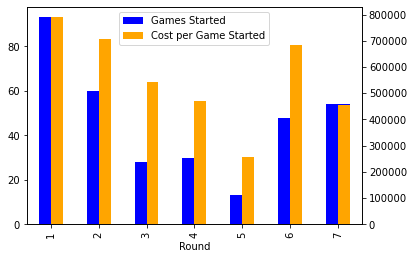

In [163]:
ax1 = graph_df1["Games Started"].plot.bar(color="blue")

ax2 = ax1.twinx()
ax2.spines['right'].set_position(('axes', 1))

graph_1 = graph_df1[["Games Started","Cost per Game Started"]].plot.bar(ax=ax2, color=["blue","orange"])

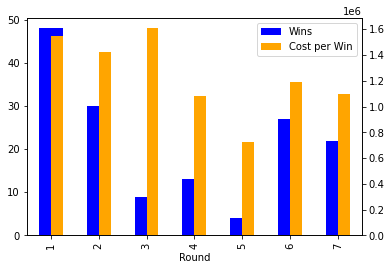

In [164]:
ax1 = graph_df2["Wins"].plot.bar(color="blue")

ax2 = ax1.twinx()
ax2.spines['right'].set_position(('axes', 1))

graph_2 = graph_df2[["Wins","Cost per Win"]].plot.bar(ax=ax2, color=["blue","orange"])

In [165]:
no_tom_merge_df=merge_df[merge_df["Player"] != "Tom Brady"]
no_tom_static_df = static_df[static_df["Player"] != "Tom Brady"]

salary_per_gs = round(no_tom_merge_df.groupby('Rnd')['Salary'].sum()/no_tom_merge_df.groupby('Rnd')['GS'].sum())
salary_per_win = round(no_tom_merge_df.groupby('Rnd')['Salary'].sum()/no_tom_merge_df.groupby('Rnd')['Wins'].sum())
starts_per_player = round(no_tom_merge_df.groupby('Rnd')['GS'].sum()/no_tom_static_df.groupby('Rnd')['Player'].count())
wins_per_player = round(no_tom_merge_df.groupby('Rnd')['Wins'].sum()/no_tom_static_df.groupby('Rnd')['Player'].count())
rounds = [1,2,3,4,5,6,7]

zipped = list(zip(rounds, salary_per_gs, starts_per_player))
zipped2 = list(zip(rounds, salary_per_win, wins_per_player))

graph_df3 = pd.DataFrame(zipped, columns=['Round','Cost per Game Started', 'Games Started']).set_index('Round')
graph_df4 = pd.DataFrame(zipped2, columns=['Round', 'Cost per Win', 'Wins']).set_index('Round')

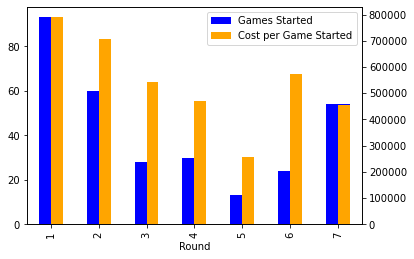

In [166]:
ax1 = graph_df3["Games Started"].plot.bar(color="blue")

ax2 = ax1.twinx()
ax2.spines['right'].set_position(('axes', 1))

graph_3 = graph_df3[["Games Started","Cost per Game Started"]].plot.bar(ax=ax2, color=["blue","orange"])

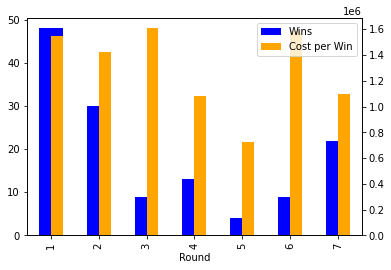

In [167]:
ax1 = graph_df4["Wins"].plot.bar(color="blue")

ax2 = ax1.twinx()
ax2.spines['right'].set_position(('axes', 1))

graph_4 = graph_df4[["Wins","Cost per Win"]].plot.bar(ax=ax2, color=["blue","orange"])